In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset dan preprocessing
dataset = pd.read_csv("../data/dataset (13).csv")

# Misal kita prediksi 'newBitrates'
target = dataset['newBitrates'].values
features = dataset[['bandwidthSpeeds', 'oldBitrates', 'streamBandwidths', 
                    'estimatedBandwidths',]] 

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Bagi data untuk training dan testing (misal 70:30)
train_X, test_X, train_y, test_y = train_test_split(scaled_features, target, test_size=0.3, shuffle=False)

# Reshape untuk input ke Transformer (batch_size, timesteps, input_dim)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class ModelSederhana(nn.Module):
    def __init__(self):
        super(ModelSederhana, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # 2 fitur/input, 10 neuron di lapisan tersembunyi
        self.fc2 = nn.Linear(10, 1)  # 10 neuron di lapisan tersembunyi, 1 output

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # aktivasi fungsi relu
        x = self.fc2(x)
        return x

model = ModelSederhana()

# Definisikan kriteria loss dan optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Contoh data
x = torch.tensor([[10.0, 100.0], [20.0, 200.0], [30.0, 300.0]])  # 3 contoh data, 2 fitur/input
y = torch.tensor([[12.0], [25.0], [35.0]])  # 3 contoh data, 1 output

# Latih model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Prediksi harga saham hari depan
x_test = torch.tensor([[40.0, 400.0]])  # contoh data baru, 2 fitur/input
prediksi = model(x_test)
print(f'Prediksi harga saham hari depan: {prediksi.item()}')

Epoch 1, Loss: 306.13751220703125
Epoch 2, Loss: 291.5132141113281
Epoch 3, Loss: 277.3067321777344
Epoch 4, Loss: 263.5211181640625
Epoch 5, Loss: 250.15870666503906
Epoch 6, Loss: 237.2211456298828
Epoch 7, Loss: 224.7094268798828
Epoch 8, Loss: 212.6234893798828
Epoch 9, Loss: 200.9625244140625
Epoch 10, Loss: 189.7253875732422
Epoch 11, Loss: 178.90960693359375
Epoch 12, Loss: 168.5121307373047
Epoch 13, Loss: 158.52914428710938
Epoch 14, Loss: 148.9559783935547
Epoch 15, Loss: 139.78773498535156
Epoch 16, Loss: 131.01820373535156
Epoch 17, Loss: 122.6410903930664
Epoch 18, Loss: 114.6492919921875
Epoch 19, Loss: 107.03506469726562
Epoch 20, Loss: 99.79036712646484
Epoch 21, Loss: 92.90657806396484
Epoch 22, Loss: 86.3746109008789
Epoch 23, Loss: 80.18528747558594
Epoch 24, Loss: 74.32881927490234
Epoch 25, Loss: 68.79540252685547
Epoch 26, Loss: 63.574737548828125
Epoch 27, Loss: 58.65658950805664
Epoch 28, Loss: 54.03057861328125
Epoch 29, Loss: 49.68594741821289
Epoch 30, Loss: 

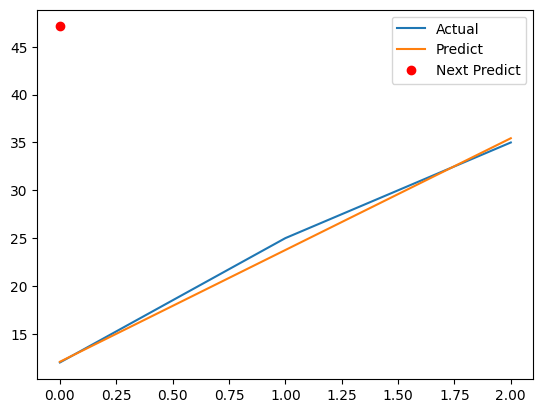

In [8]:
import matplotlib.pyplot as plt

# Prediksi harga saham hari depan
x_test = torch.tensor([[40.0, 400.0]])  # contoh data baru, 2 fitur/input
prediksi = model(x_test)

# Plot actual vs predict
plt.plot(y.detach().numpy(), label='Actual')
plt.plot(model(x).detach().numpy(), label='Predict')
plt.plot([prediksi.item()], 'ro', label='Next Predict')
plt.legend()
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca dataset CSV
data = pd.read_csv('../data/dataset (13).csv')
data.drop(columns=['resolutions', 'timeStamps','activeBitrates'], inplace=True)

# Membagi data menjadi training dan testing sets

In [40]:
features = data[['bandwidthSpeeds', 'oldBitrates', 'streamBandwidths', 
                    'estimatedBandwidths',]]
y = data['newBitrates']  # target
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

,bandwidthSpeeds,oldBitrates,streamBandwidths,estimatedBandwidths
72,1.3,5019963,1.2,2.0
244,1.4,826869,5.6,5.0
437,1.4,574317,1.2,2.5
79,1.3,5019963,1.2,2.8
402,1.4,1080381,1.2,1.9
...,...,...,...,...
220,1.4,321391,5.6,9.6
227,1.4,574317,8.0,9.5
324,1.4,1321829,3.1,4.5
398,1.4,1321829,1.0,1.4


In [41]:
import torch
import torch.nn as nn

class ModelSederhana(nn.Module):
    def __init__(self):
        super(ModelSederhana, self).__init__()
        self.fc1 = nn.Linear(3, 10)  # 3 fitur/input, 10 neuron di lapisan tersembunyi
        self.fc2 = nn.Linear(10, 1)  # 10 neuron di lapisan tersembunyi, 1 output

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # aktivasi fungsi relu
        x = self.fc2(x)
        return x

model = ModelSederhana()

# Definisikan kriteria loss dan optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [49]:
X_train.shape
y_train.shape

(390,)

In [43]:
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train).float())
    loss = criterion(outputs, torch.tensor(y_train).float())
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

ValueError: could not determine the shape of object type 'DataFrame'